In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import os
import math
import sklearn.metrics as metrics
import scikitplot as skplt
import statistics as st
import heapq
import operator
import errno
from itertools import islice

In [2]:
def mkdir_p(path):
    """To make a directory given a path."""
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

In [3]:
folder = '20201204_8_char_secret_100_insertions_50_run'

# Load results for plotting
#res_folder = 'Results/results_{}_len/'.format(secret_len)
res_folder = 'Results/{}/results/'.format(folder)

files = os.listdir(res_folder)

g = []
for file_name in files:
    file_path = os.path.join(res_folder, file_name)
    h = pickle.load(open(file_path, 'rb'))
    g.append(h)
print('Read Disk')
print('{} TEST RUNS FOUND'.format(len(g)))

plt_folder = 'Results/{}_PLOTS/'.format(folder)

mkdir_p(plt_folder)

Read Disk
50 TEST RUNS FOUND


In [4]:
secret_phrase = g[0][1]
secret_code = secret_phrase.split()[-1]
secret_length = len(secret_code)
secret_length, secret_code

(8, 'asdfasdf')

In [5]:
#PASSWORD DICTIONARY
secret_comb = []
with open('10-million-password-list-top-1000000.txt','r') as file:  
    for line in file: 
        for word in line.split():          
            secret_comb.append(word)

agg_scores = {}
ranks_per_code = {}
score_per_insertion = {g[i][3]:{} for i in range(len(g))}

print(score_per_insertion)

for i in range(len(g)):
    score = g[i][0][0]
    insertions = g[i][3]
    sorted_score = dict(sorted(score.items(), key=operator.itemgetter(1), reverse=True))
    rank = 1
    for code in sorted_score.items():
        if code[0] not in agg_scores.keys():
            score_per_insertion[insertions][code[0]] = []
            agg_scores[code[0]] = []
            ranks_per_code[code[0]] = []
            ranks_per_code[code[0]].append(rank)
            agg_scores[code[0]].append(code[1])
            score_per_insertion[insertions][code[0]].append(code[1])
            rank+=1
        elif code[0] not in score_per_insertion[insertions].keys():
            score_per_insertion[insertions][code[0]] = []
            score_per_insertion[insertions][code[0]].append(code[1])
        else:    
            ranks_per_code[code[0]].append(rank)
            agg_scores[code[0]].append(code[1])
            score_per_insertion[insertions][code[0]].append(code[1])
            rank+=1

{100: {}}


In [26]:
#NUMERIC SEARCH SPACE
import itertools

secret_comb = []

filename = 'Results/{}/1000_9_len_digits.pickle3'.format(folder)
file = open(filename, 'rb')
secret_comb = pickle.load(file)

agg_scores = {}
ranks_per_code = {}
score_per_insertion = {g[i][3]:{} for i in range(len(g))}

print(score_per_insertion)

for i in range(len(g)):
    score = g[i][0][0]
    insertions = g[i][3]
    sorted_score = dict(sorted(score.items(), key=operator.itemgetter(1), reverse=True))
    rank = 1
    for code in sorted_score.items():
        if code[0] not in agg_scores.keys():
            score_per_insertion[insertions][code[0]] = []
            agg_scores[code[0]] = []
            ranks_per_code[code[0]] = []
            ranks_per_code[code[0]].append(rank)
            agg_scores[code[0]].append(code[1])
            score_per_insertion[insertions][code[0]].append(code[1])
            rank+=1
        elif code[0] not in score_per_insertion[insertions].keys():
            score_per_insertion[insertions][code[0]] = []
            score_per_insertion[insertions][code[0]].append(code[1])
        else:    
            ranks_per_code[code[0]].append(rank)
            agg_scores[code[0]].append(code[1])
            score_per_insertion[insertions][code[0]].append(code[1])
            rank+=1

{100: {}}


In [6]:
avg_conf_score_per_insertion = {insertion: {} for insertion in  score_per_insertion.keys()}
avg_rank_per_insertion = {insertion: {} for insertion in  score_per_insertion.keys()}

avg_conf_score_per_insertion_gt = {insertion: None for insertion in  score_per_insertion.keys()}
avg_rank_per_insertion_gt = {insertion: None for insertion in  score_per_insertion.keys()}

for insertions in score_per_insertion.items():
    sorted_score = dict(sorted(insertions[1].items(), key=operator.itemgetter(1), reverse=True))
    rank = 1
    for scores in sorted_score.items():
        avg_conf_score_per_insertion[insertions[0]][scores[0]] = np.mean(np.array(scores[1]))
        avg_rank_per_insertion[insertions[0]][scores[0]] = rank
        rank+=1
    avg_conf_score_per_insertion_gt[insertions[0]] = avg_conf_score_per_insertion[insertions[0]][secret_code]
    avg_rank_per_insertion_gt[insertions[0]] = avg_rank_per_insertion[insertions[0]][secret_code]
    
avg_scores = {}
avg_ranks = {}

for scores in agg_scores.items():
    avg_scores[scores[0]] = np.mean(np.array(scores[1]))

for scores in ranks_per_code.items():
    avg_ranks[scores[0]] = np.mean(np.array(scores[1]))

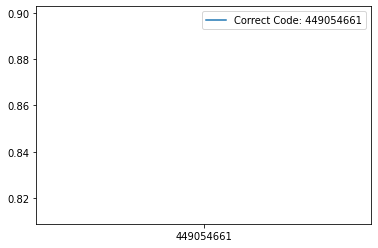

In [204]:
#NUMERIC SEARCH SPACE WITH ALL POSSIBILITIES

def chunks(data, SIZE=10000):
    it = iter(data)
    for i in range(0, len(data), SIZE):
        yield {k:data[k] for k in islice(it, SIZE)}
   
# for item in chunks(avg_scores, 10000):
#     print(item)
    
dict_chunks = []
for i in chunks(avg_scores, 10000):
    dict_chunks.append(i)
    
x = []
y = []
for i in dict_chunks:
    x.append(list(i.items())[0][0])
    y.append(np.mean(np.array(list(i.values()))))
    

plt.plot(x, y, label='Correct Code: {}'.format(secret_code))
plt.legend()

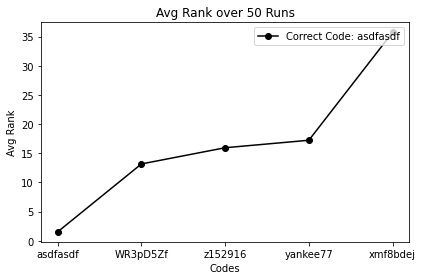

In [7]:
#FIGURE 1 - AVERAGE RANKING

plt.figure()

top_N = 5

newA = dict(sorted(avg_ranks.items(), key=operator.itemgetter(1), reverse=False)[:top_N])

lists = newA.items()

x, y = zip(*lists)

plt.plot(x, y, '-ok', label='Correct Code: {}'.format(secret_code))
plt.xlabel('Codes')
plt.ylabel('Avg Rank')
plt.title('Avg Rank over {} Runs'.format(len(g)))
plt.legend(loc='upper right')
plt.tight_layout()
plt_dest = plt_folder + 'TOP{}_AVERAGE_RANK'.format(top_N)
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()

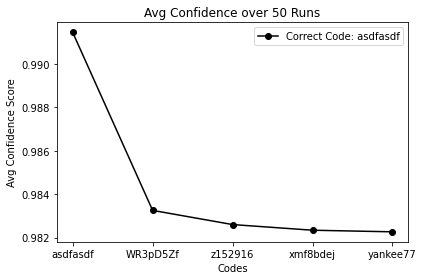

In [8]:
# FIGURE 2 - AVERAGE CONFIDENCE SCORE

plt.figure()

top_N = 5

newA = dict(sorted(avg_scores.items(), key=operator.itemgetter(1), reverse=True)[:top_N])

lists = newA.items()

x, y = zip(*lists)

plt.plot(x, y, '-ok', label='Correct Code: {}'.format(secret_code))
plt.xlabel('Codes')
plt.ylabel('Avg Confidence Score')
plt.title('Avg Confidence over {} Runs'.format(len(g)))
plt.legend(loc='upper right')
plt.tight_layout()
plt_dest = plt_folder + 'TOP{}_AVERAGE_CONFIDENCE_SCORE'.format(top_N)
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()

{100: 0.991452679878394}


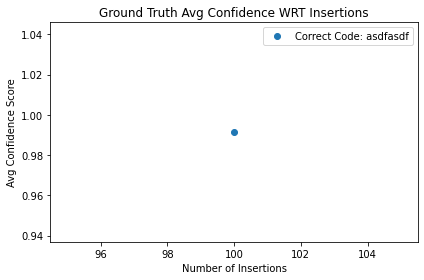

In [9]:
# FIGURE 3 - AVERAGE CONFIDENCE SCORE WRT INSERTION

plt.figure()

#top_N = 5

newA = dict(sorted(avg_conf_score_per_insertion_gt.items(), key=operator.itemgetter(0), reverse=True))
print(newA)

lists = newA.items()

x, y = zip(*lists)

plt.plot(x, y, 'o', label='Correct Code: {}'.format(secret_code))
plt.xlabel('Number of Insertions')
plt.ylabel('Avg Confidence Score')
plt.title('Ground Truth Avg Confidence WRT Insertions')
plt.legend(loc='upper right')
plt.tight_layout()
plt_dest = plt_folder + 'GT_AVERAGE_CONFIDENCE_SCORE_WRT_INSERTIONS'
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()

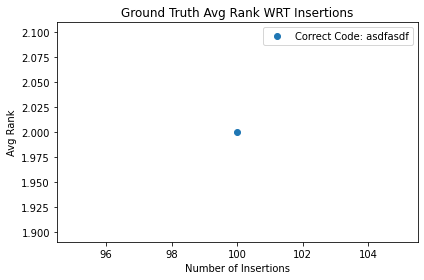

In [10]:
# FIGURE 3 - AVERAGE RANK SCORE WRT INSERTION

plt.figure()

#top_N = 5

newA = dict(sorted(avg_rank_per_insertion_gt.items(), key=operator.itemgetter(0), reverse=True))

lists = newA.items()

x, y = zip(*lists)

plt.plot(x, y, 'o', label='Correct Code: {}'.format(secret_code))
plt.xlabel('Number of Insertions')
plt.ylabel('Avg Rank')
plt.title('Ground Truth Avg Rank WRT Insertions')
plt.legend(loc='upper right')
plt.tight_layout()
plt_dest = plt_folder + 'GT_AVERAGE_RANK_WRT_INSERTIONS'
plt.savefig(plt_dest,
        bbox_inches="tight")
plt.show()